# Misclassification evaluation: False negatives

10/10/2022

## To do
**Groups to compare**
- FN (bench)
- TP (bench)
- Training set Real positives (Class SP from the training set)


- **For the vH**
  - Find if the -13,+2 region has a different logo between the groups


- **For the SVM**
  - Find the distribution of SP length 
  - Find the residue composition of the first k (the best k obtained by SVM training)


**Extra**

Obtain the species composition of the false positive and false negative groups (later, compare it with the training set)

## 0. Loading data

### A. vH Data extraction

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
def text_line_extract(filename):
  with open(filename, 'r') as fh:
    id_list = []
    for line in fh:
      id_list.append(line.strip())
  return id_list

In [ ]:
#Parsing real positive text list 
vh_real_positives = text_line_extract('real_positives.txt')

FileNotFoundError: ignored

In [ ]:
#Parsing false negative text list 
vh_false_negatives = text_line_extract('false_negatives.txt')

In [ ]:
#Parsing false positive text list 
vh_false_positives = text_line_extract('false_positives.txt')

In [ ]:
vh_real_positives[0:5]

In [ ]:
vh_false_negatives[0:5]

['P23631', 'P32004', 'P38570', 'C0HJQ4', 'C0HJQ5']

**Benchmark subsets**

In [ ]:
bench = pd.read_csv("benchmark_set.tsv", sep='\t')

In [ ]:
bench.loc[bench["Class"] == "SP", :].head()

UniProtKB accession                                               Taxa  \
6929              A1X158                            Rattus norvegicus (Rat)   
6930              D3Z9M3                            Rattus norvegicus (Rat)   
6931              P42264  Patiria pectinifera (Starfish) (Asterina pecti...   
6932              C9K4X8  Aspergillus oryzae (strain ATCC 42149 / RIB 40...   
6933              Q2U4L7                               Homo sapiens (Human)   

      Kingdom Class            Sequence (first 50 N-terminal residues)  \
6929  Metazoa    SP  MARNMNILTLFAVLIGSASAVYHPPSWTAWIAPKPWTAWKVHPPAW...   
6930  Metazoa    SP  MLVILLMVVVLALSSAQDPNRDFVVSSQDVRERQPSSQQGTVGGQS...   
6931  Metazoa    SP  MTAPWRRLRSLVWEYWAGFLVCAFWIPDSRGMPHVIRIGGIFEYAD...   
6932    Fungi    SP  MTSNNRHLFQATCLVLLLLHAAFHGGALGEKYCDDDFHMAVFRTCA...   
6933  Metazoa    SP  MMHFLSFCLSVASLVSYAGAASTFSPARPPALPLAVKSPYLSTWLS...   

                            SP cleavage-site annotation  
6929  SSSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNN...  
6930  SSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...  
6931  SSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNN...  
6932  SSSSSSSSSSSSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNN...  
6933  SSSSSSSSSSSSSSSSSSSSNNNNNNNNNNNNNNNNNNNNNNNNNN...

In [ ]:
#Extracting the real positive subset of the benchmark examples
vh_RP_filter = bench.loc[:, "UniProtKB accession"].isin(vh_real_positives)
bench_vh_RP = bench.loc[vh_RP_filter, :]

In [ ]:
#Extracting the false negative subset of the examples
vh_FN_filter = bench.loc[:, "UniProtKB accession"].isin(vh_false_negatives)
bench_vh_FN = bench.loc[vh_FN_filter, :]

In [ ]:
#Extracting the true positive subset of the benchmark examples
vh_RP_to_FN_filter = bench_vh_RP.loc[:, "UniProtKB accession"].isin(vh_false_negatives)
bench_vh_TP = bench_vh_RP.loc[~vh_RP_to_FN_filter, :] #"~" obtains the opposite Boolean value

In [ ]:
#Extracting the false positive subset of the examples
vh_FP_filter = bench.loc[:, "UniProtKB accession"].isin(vh_false_positives)
bench_vh_FP = bench.loc[vh_FP_filter, :]

In [ ]:
bench_vh_RP.shape

In [ ]:
bench_vh_FN.shape

In [ ]:
bench_vh_TP.shape

**Training set positive class (Class == SP)**

In [ ]:
train = pd.read_csv("training_set.tsv", sep='\t')

In [ ]:
train.head()

In [ ]:
#Extracting the real positive subset from the training set
train_RP = train.loc[train.Class=="SP", :]

### B. SVM data extraction

In [ ]:
#Parsing real positive text list 
svm_real_positives = text_line_extract('svm_real_positives.txt')

In [ ]:
#Parsing false negative text list 
svm_false_negatives = text_line_extract('svm_false_negatives.txt')

In [ ]:
#Parsing false positive text list 
svm_false_positives = text_line_extract('svm_false_positives.txt')

In [ ]:
#Reloading the benchmark and training datasets
bench = pd.read_csv("benchmark_set.tsv", sep='\t')
train = pd.read_csv("training_set.tsv", sep='\t')

**Benchmark subsets**

Remember that the benchmark dataset is the same for SVM and for vH.
Therefore, we will assume that the "bench" object is already loaded. 

In [ ]:
#Extracting the real positive subset of the benchmark examples
svm_RP_filter = bench.loc[:, "UniProtKB accession"].isin(svm_real_positives)
bench_svm_RP = bench.loc[svm_RP_filter, :]

In [ ]:
#Extracting the false negative subset of the examples
svm_FN_filter = bench.loc[:, "UniProtKB accession"].isin(svm_false_negatives)
bench_svm_FN = bench.loc[svm_FN_filter, :]

In [ ]:
#Extracting the true positive subset of the benchmark examples
svm_RP_to_FN_filter = bench_svm_RP.loc[:, "UniProtKB accession"].isin(svm_false_negatives)
bench_svm_TP = bench_svm_RP.loc[~svm_RP_to_FN_filter, :] #"~" obtains the opposite Boolean value

In [ ]:
#Extracting the false positive subset of the examples
svm_FP_filter = bench.loc[:, "UniProtKB accession"].isin(svm_false_positives)
bench_svm_FP = bench.loc[svm_FP_filter, :]

In [ ]:
#Printing dimensions
print(bench_svm_RP.shape, bench_svm_FN.shape, bench_svm_TP.shape)

(209, 6) (53, 6) (156, 6)


**Training set positive class (Class == SP)**

I am going to assume that we already obtained the object `train_RP`, which should contain all the `Class=='SP'` objects from the training set.  

## 1. vH analysis

### A. Logo comparison

#### i. Extracting the cleavage sequences

In [ ]:
def cleavage_seq(data):
  """
  This code is meant to extract the cleavage site residues (-13:2)
  """
  sequences = data.loc[:,'Sequence (first 50 N-terminal residues)'].tolist()
  sp = data.loc[:, 'SP cleavage-site annotation'].tolist()
  seq_list = []
  for i,seq in enumerate(sp):
    #cleav_seq = ''
    for j,letter in enumerate(seq):
      if letter == "S":
        pass
      elif seq[j-1] == "S":
        cleav_seq = sequences[i][j-13:j+2]
    #if not cleav_seq:
      #pass
      #input(i)
    seq_list.append(cleav_seq)
  return seq_list

In [ ]:
def write_sequences(seq_list, name):
  with open(name, 'w') as fh:
    for seq in seq_list:
      fh.write(seq+'\n')

In [ ]:
#Obtaining the cleavage sequences
vh_TP_cleav = cleavage_seq(bench_vh_TP)
vh_FN_cleav = cleavage_seq(bench_vh_FN)
vh_RP_cleav = cleavage_seq(train_RP)

NameError: ignored

In [ ]:
vh_TP_cleav[0]

In [ ]:
#Saving the cleavage sequence lists
write_sequences(vh_TP_cleav, "vH_TP_cleav.txt")
write_sequences(vh_FN_cleav, "vH_FN_cleav.txt")
write_sequences(vh_RP_cleav, "vH_RP_cleav.txt")

#### ii. Producing the corresponding logo

Benchmark True positive logo

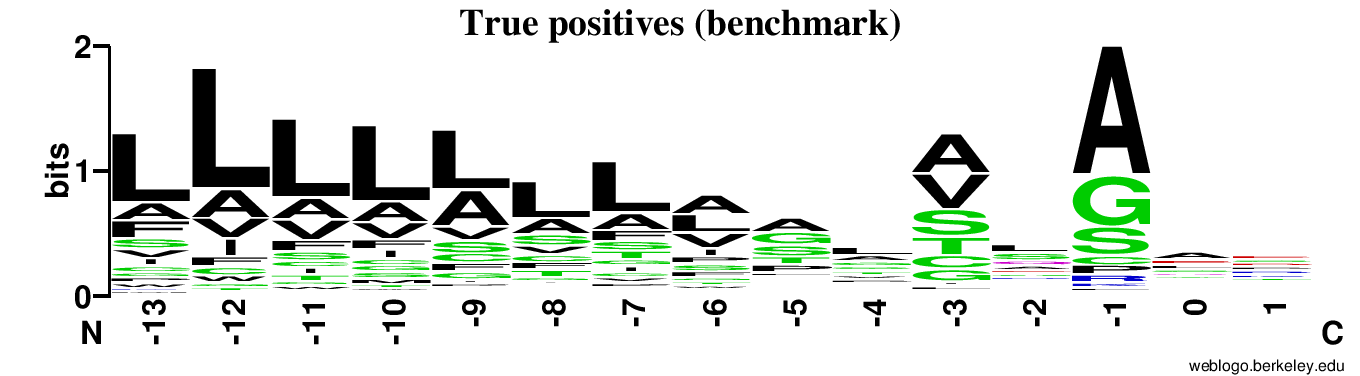

Benchmark False negative logo


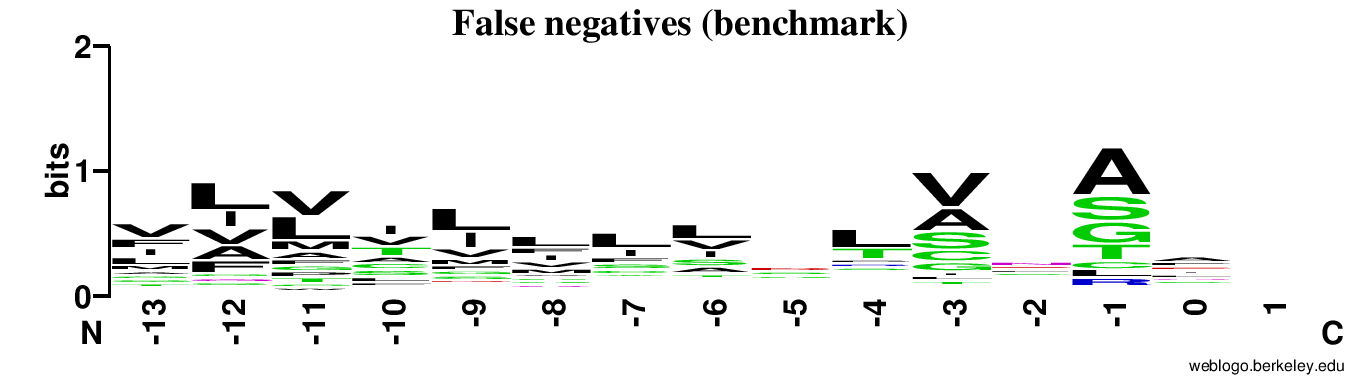





Training actual positives logo

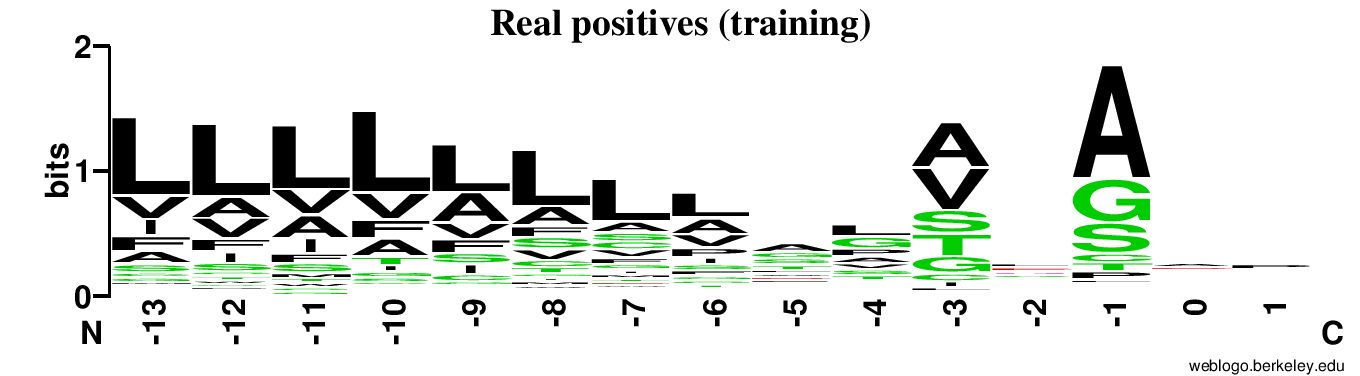

## 2. SVM analysis

### A. SP length distribution

In [ ]:
bench.head()

UniProtKB accession                                    Taxa  Kingdom  Class  \
0              Q8TF40                    Homo sapiens (Human)  Metazoa  NO_SP   
1              Q1ENB6  Arabidopsis thaliana (Mouse-ear cress)   Plants  NO_SP   
2              Q9BZS1                    Homo sapiens (Human)  Metazoa  NO_SP   
3              F4K2A1  Arabidopsis thaliana (Mouse-ear cress)   Plants  NO_SP   
4              Q9SZL8  Arabidopsis thaliana (Mouse-ear cress)   Plants  NO_SP   

             Sequence (first 50 N-terminal residues)  \
0  MAPTLFQKLFSKRTGLGAPGRDARDPDCGFSWPLPEFDPSQIRLIV...   
1  MDFTSLETTTFEEVVIALGSNVGNRMNNFKEALRLMKDYGISVTRH...   
2  MPNPRPGKPSAPSLALGPSPGASPSWRAAPKASDLLGARGPGGTFQ...   
3  MFAVSIVPRTTSCRLSSAFLCQLSIPLTLRLHHHYQHHQPHLPSPL...   
4  MMDNEVLDFDIGVGVSSGGDVDDDAIDIEHHALDDDDMLDSPIMPC...   

                         SP cleavage-site annotation  
0  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...  
1  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...  
2  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...  
3  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...  
4  NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...

In [ ]:
def sp_distrib(x):
  '''Counts the number of 'S' inside the Series of strings'''
  return x['SP cleavage-site annotation'].count('S')

In [ ]:
#Checking the function works as intended
#bench_svm_FN.apply(func=sp_distrib, axis=1)
bench_svm_FN.loc[6929, 'SP cleavage-site annotation'].count('S')

20

In [ ]:
#Obtaining the respective S distributions
svm_SP_len_FN = bench_svm_FN.apply(func=sp_distrib, axis=1).tolist()
svm_SP_len_TP = bench_svm_TP.apply(func=sp_distrib, axis=1).tolist()
svm_SP_len_RP = train_RP.apply(func=sp_distrib, axis=1).tolist()

[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'SP length'),
 Text(0.5, 1.0, 'SVM False negative')]

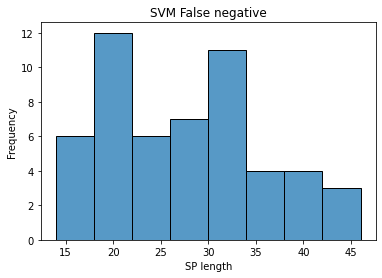

In [ ]:
#Producing the plots
sb.histplot(svm_SP_len_FN, bins=8).set(title='SVM False negative', xlabel='SP length', ylabel='Frequency') #choosing bin size to avoid empty spaces

In [ ]:
pd.Series(svm_SP_len_FN).describe()

count    53.000000
mean     27.207547
std       8.139076
min      14.000000
25%      20.000000
50%      27.000000
75%      32.000000
max      46.000000
dtype: float64

**Comment**

There is a nearly uniform/platykurtic distribution of SP lengths from the range of 14 to 46. In addition, the mean and median of SP length is that of 27 and the stdev is of 8. In comparison, the SVM model based on the training selected for the k=22 hyperparaneter, which means that more than 50% of the false negatives were not correctly represented. 

[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'SP length'),
 Text(0.5, 1.0, 'SVM True positive')]

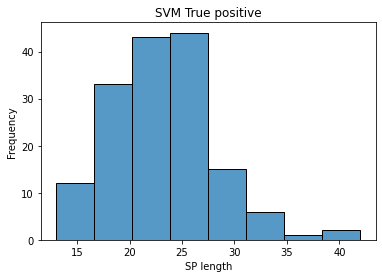

In [ ]:
sb.histplot(svm_SP_len_TP, bins=8).set(title='SVM True positive', xlabel='SP length', ylabel='Frequency') #choosing bin size to avoid empty spaces

In [ ]:
pd.Series(svm_SP_len_TP).describe()

count    156.000000
mean      23.173077
std        4.901828
min       13.000000
25%       20.000000
50%       22.500000
75%       26.000000
max       42.000000
dtype: float64

**Comment**

In comparison, TP examples had a mean of 23 and a median of 22.5. In addition, the stdev was lower (4.9). Indeed, even if some sequences in the extremes of SP length (starting at 13 and ending at 42) were correctly classified, their frequency is considerably lower in the TP group. 

[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'SP length'),
 Text(0.5, 1.0, 'SVM Training Real positive')]

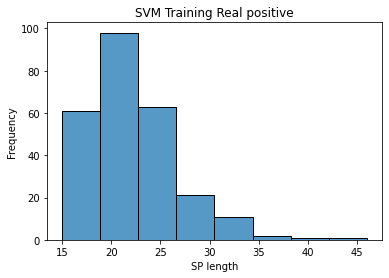

In [ ]:
sb.histplot(svm_SP_len_RP, bins = 8).set(title='SVM Training Real positive', xlabel='SP length', ylabel='Frequency') #choosing bin size to avoid empty spaces

In [ ]:
pd.Series(svm_SP_len_RP).describe()

count    258.000000
mean      22.027132
std        4.747643
min       15.000000
25%       19.000000
50%       21.000000
75%       24.000000
max       46.000000
dtype: float64

Indeed, the the distribution of SP length values in the training set highly corresponds to the hyperparameter k=22 which was favored in the grid search. The mean is 22, while the median is 21. The standard deviation is 4.74, which is mirrors the observed value in the TP group from the benchmark. Interestingly, a large proportion of sequences with a reduced SP length are included, but those with a larger SP length are scarse. 

**Boxplot**

In [ ]:
#Joining all distributions into a dataframe for the boxplot
sp_distrib_full  = pd.concat([pd.Series(svm_SP_len_FN), pd.Series(svm_SP_len_TP), pd.Series(svm_SP_len_RP)], keys=['False negatives', 'True positives', 'Real positives (training set)'])
sp_distrib_full = sp_distrib_full.reset_index(level=0).rename(mapper ={"level_0":"Group", 0:"SP length"}, axis=1)

In [ ]:
#Removing duplicated index
sp_distrib_full.index.duplicated #checking list of duplicated indeces
sp_distrib_full = sp_distrib_full.reset_index(drop=True)

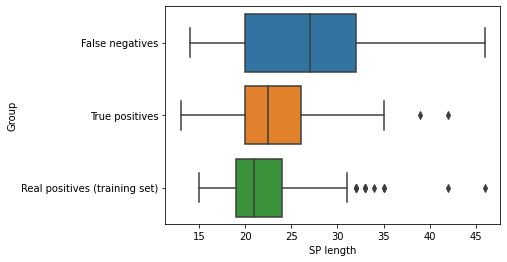

In [ ]:
#Getting the boxplots
sb.boxplot(data=sp_distrib_full, x="SP length", y="Group")

**Density distribution**

[Text(0.5, 0, 'SP length'),
 Text(0.5, 1.0, 'SVM benchmark False negative diagnosis')]

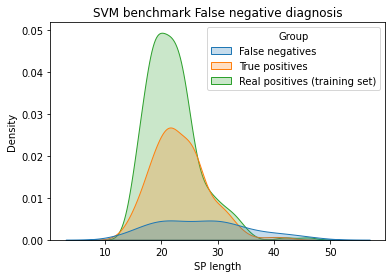

In [ ]:
#Density plot
sb.kdeplot(sp_distrib_full["SP length"], shade=True, hue=sp_distrib_full["Group"]).set(title = 'SVM benchmark False negative diagnosis', xlabel='SP length')

### B. Residue composition of the first k residues

In [ ]:
#Residue order
res = ['G', 'A', 'V', 'P', 'L', 'I', 'M', 'F', 'W', 'Y', 'S', 'T', 'C', 'N', 'Q', 'H', 'D', 'E', 'K', 'R']

In [ ]:
#Obtaining the list of sequences to analyze
svm_seqs_FN = bench_svm_FN.loc[:, 'Sequence (first 50 N-terminal residues)'].tolist()
svm_seqs_TP = bench_svm_TP.loc[:, 'Sequence (first 50 N-terminal residues)'].tolist()
svm_seqs_RP = train_RP.loc[:, 'Sequence (first 50 N-terminal residues)'].tolist()

In [ ]:
def composition_sequences(sequences, k, alphabet):
  """
	This function will return the 20 dimensional vector that establishes the
   amino acid composition for every sequence in the training dataset dataframe
   (adapted from svm_encode.py)
	
	k: Assumed SP length to be used in order to extract the corresponding subsequence 
  from each training example. This is one of the model's hyperparameters.
	
	sequences = An list that contains the list of sequences to be 
  described. It is assumed to be the first N-terminal residues of the sequence.  
	
	alphabet = defines the aminoacid string alphabet and their default order. 
	
	Returns a numpy array in which axis 0 corresponds to the different residue
  composition percentages. So, an array	of shape (20). 
	"""
	#Initialization
  residue_count = {}

	#Iterating over sequences
  for seq in sequences:
		
		#Obtaining the residue count for the first k residues
    char_count = 0	
    for residue in seq[0:k]:
      residue_count[residue] = residue_count.get(residue, 0) + 1
			
  #Dict to array
  residue_comp_vector= np.array([residue_count.get(residue,0) for residue in alphabet])
  
  #Count to percentage composition
  residue_comp_vector = (residue_comp_vector/residue_comp_vector.sum())*100
  
  return residue_comp_vector

In [ ]:
#Obtaining the percentage of composition for each group for the first 22 residues
comp_FN = composition_sequences(svm_seqs_FN, 22, res)
comp_TP = composition_sequences(svm_seqs_TP, 22, res)
comp_RP = composition_sequences(svm_seqs_RP, 22, res)

In [ ]:
#Concatenating all results into a dataframe (keeping amino acid order index)
comp_full = pd.concat([pd.Series(comp_FN), pd.Series(comp_TP), pd.Series(comp_RP)], keys=['False negatives', 'True positives', 'Real positives (training set)'], axis=0)
comp_full = comp_full.reset_index(level=0).rename(mapper ={"level_0":"Group", 0:"Percentage"}, axis=1)

In [ ]:
comp_full.head()

Group  Percentage
0  False negatives    6.603774
1  False negatives   11.835334
2  False negatives    6.174957
3  False negatives    5.917667
4  False negatives   14.837050

In [ ]:
#Adding the residue column
residues = pd.Series(res, name='residues')
#comp_full_res = 
comp_full_res = pd.merge(comp_full, residues, left_index=True, right_index=True)

In [ ]:
comp_full_res.shape

(60, 3)

In [ ]:
comp_full_res.head()

Group  Percentage residues
0                False negatives    6.603774        G
0                 True positives    5.303030        G
0  Real positives (training set)    5.391121        G
1                False negatives   11.835334        A
1                 True positives   13.811189        A

**Obtaining the composition graph**

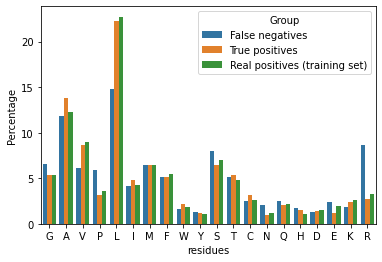

In [ ]:
sb.barplot(data=comp_full_res, x="residues", y="Percentage", hue="Group")

# Kingdom composition evaluation

We will do this for both the SVM and vH methods

## vH kingdom evaluation

In [ ]:
bench_vh_FP['Kingdom'].unique()

array(['Metazoa', 'Plants', 'Fungi', 'Other'], dtype=object)

In [ ]:
bench_vh_FN['Kingdom'].unique()

array(['Metazoa', 'Fungi', 'Plants', 'Other'], dtype=object)

In [ ]:
def pie_chart_kingdom(df):
  king = df['Kingdom']
  king_series = king.value_counts() #obtains the counts of each unique value
  king_series = king_series.sort_values(ascending=False) #alternative .nlargest(10)
  #king_series_top = king_series_sorted[0:6] #extracting top 6
  #king_series_rest = king_series_sorted[7:]
  #others_series = pd.Series({'others':king_series_rest.sum()}) #creating a series that containg the sum of the others
  #king_series_complete = pd.concat([king_series_top, others_series])
  print(king_series)
  labels = king_series.index.tolist() #labels
  count = king_series.values.tolist() #count for each label
  colors = sb.color_palette('bright')[:len(labels)]  #define color palette
  plt.pie(count, colors = colors, autopct='%.0f%%')
  plt.legend(labels, loc='upper left', bbox_to_anchor=(1,1)) #bbox controls the position of the legend
  plt.show()

Metazoa    956
Fungi      429
Plants     314
Other       24
Name: Kingdom, dtype: int64


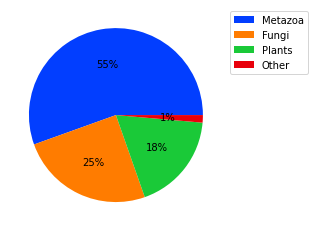

In [ ]:
#Obtaining the training set distribution
pie_chart_kingdom(train)

Metazoa    99
Plants     51
Fungi      22
Other       4
Name: Kingdom, dtype: int64


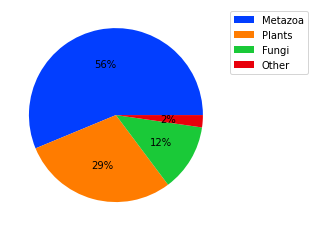

In [ ]:
#Obtaining the benchmark false positive group
pie_chart_kingdom(bench_vh_FP)

For the False Positive group, the taxa seems to have no relevance whatsoever. 

Metazoa    42
Fungi       6
Plants      4
Other       1
Name: Kingdom, dtype: int64


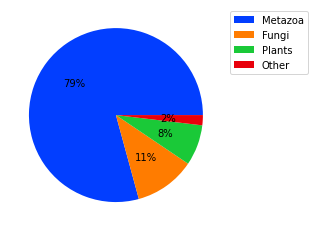

In [ ]:
#Obtaining the benchmark false negative group
pie_chart_kingdom(bench_vh_FN)

With the false negative group, we seem to have an overrepresentation of Metazoa instead. 

## SVM Kingdom evaluation

In [ ]:
bench_svm_FP['Kingdom'].unique()

array(['Plants', 'Metazoa', 'Fungi', 'Other'], dtype=object)

In [ ]:
bench_svm_FN['Kingdom'].unique()

array(['Metazoa', 'Fungi', 'Plants'], dtype=object)

Metazoa    956
Fungi      429
Plants     314
Other       24
Name: Kingdom, dtype: int64


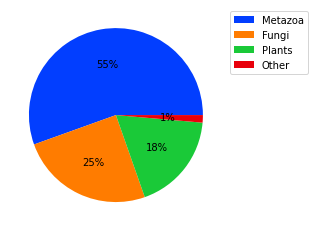

In [ ]:
#Obtaining the training group
pie_chart_kingdom(train)

Metazoa    86
Plants     30
Fungi      22
Other       3
Name: Kingdom, dtype: int64


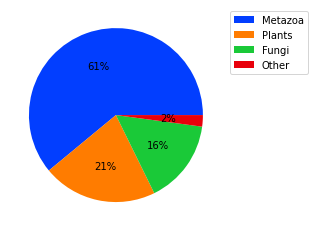

In [ ]:
#Obtaining the false positive group
pie_chart_kingdom(bench_svm_FP)

Metazoa    45
Plants      5
Fungi       3
Name: Kingdom, dtype: int64


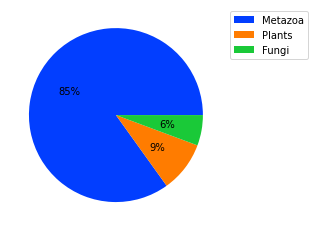

In [ ]:
#Obtaining the false negative group
pie_chart_kingdom(bench_svm_FN)

Similar results for the SVM. Now, the Metazoa group completely overtakes every other one. 